# **Multi Label Image Clasification For Movie Poster Genres -EfficientNet CNN**
## Group - 12



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
import torch.nn as nn
import torch.optim as optim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### **Extracting the dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DL-Project/Movies-Poster_Dataset/train.csv')
df.shape

(7254, 27)

In [ ]:
img_folder = '/content/drive/MyDrive/DL-Project/Movies-Poster_Dataset/Images/'

In [ ]:
class ImageDataset(Dataset):
  
  def __init__(self,csv,img_folder,transform):
    self.csv=csv
    self.transform=transform
    self.img_folder=img_folder
    
    self.image_names=self.csv[:]['Id']
    self.labels=np.array(self.csv.drop(['Id', 'Genre'], axis=1))
  
  def __len__(self):
    return len(self.image_names)

  def __getitem__(self,index):
    
    image=cv2.imread(self.img_folder+self.image_names.iloc[index]+'.jpg')
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    image=self.transform(image)
    targets=self.labels[index]

    return (image,targets)

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.15)

In [ ]:
len(train_set)

6165

In [ ]:
len(test_set)

1089

In [ ]:
train_transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((350, 350)),
                transforms.ToTensor()])

test_transform =transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((350, 350)),
                transforms.ToTensor()])

train_dataset=ImageDataset(train_set,img_folder,train_transform)
test_dataset=ImageDataset(test_set,img_folder,test_transform)

In [ ]:
img,labels = train_dataset.__getitem__(0)  #FOR PREVIEW
print(img.shape, labels)

torch.Size([3, 350, 350]) [0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
num_classes = 25
batch_size = 11

In [ ]:
train_dataloader = DataLoader(
    train_dataset, 
    batch_size=batch_size,
    shuffle=True
)

test_dataloader = DataLoader(
    test_dataset, 
    batch_size=batch_size,
    shuffle=True
)

In [ ]:
df

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,tt2409818,"['Action', 'Crime', 'Thriller']",1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7250,tt2062622,"['Animation', 'Comedy', 'Family']",0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7251,tt2442502,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7252,tt3455850,['Documentary'],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Previewing a sample**

In [ ]:
df_copy = df
image_dict = df_copy.drop(['Id', 'Genre'], axis=1)

In [ ]:
d = {}

i = 0
for gen in image_dict.columns:

  d[i] = gen
  i+=1

In [ ]:
d

{0: 'Action',
 1: 'Adventure',
 2: 'Animation',
 3: 'Biography',
 4: 'Comedy',
 5: 'Crime',
 6: 'Documentary',
 7: 'Drama',
 8: 'Family',
 9: 'Fantasy',
 10: 'History',
 11: 'Horror',
 12: 'Music',
 13: 'Musical',
 14: 'Mystery',
 15: 'N/A',
 16: 'News',
 17: 'Reality-TV',
 18: 'Romance',
 19: 'Sci-Fi',
 20: 'Short',
 21: 'Sport',
 22: 'Thriller',
 23: 'War',
 24: 'Western'}

In [ ]:
dataiter = iter(train_dataloader)
images,targets = dataiter.next()

In [ ]:
print(images.shape)

torch.Size([11, 3, 350, 350])


In [ ]:
print(images[1].shape)

torch.Size([3, 350, 350])


In [ ]:
print(targets[0])

tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0])


## **Visualise data**


Crime
Drama
Fantasy


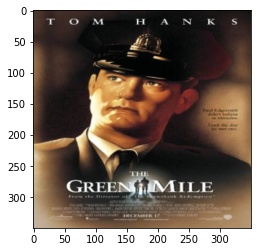

In [ ]:
def show_example(img, label,d):

    for index in range(len(labels)):

      if(labels[index]==1):
        print(d[index])
        
    plt.imshow(img.permute(1, 2, 0))
  
show_example(img,labels,d)

### **Image Grid of batch size 33**

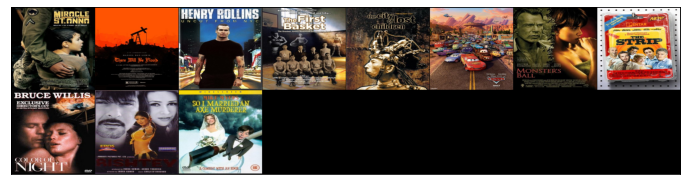

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break
        
show_batch(train_dataloader)

In [ ]:
from torchvision import models
import torch.nn as nn
import copy

In [ ]:
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=1f31c78c52e0a062bedd2a1bd65068b690cc53c56f2e7fabf639fcd4cded4620
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


### **Efficient-Net**

In [ ]:
from efficientnet_pytorch import EfficientNet
efnet = EfficientNet.from_name('efficientnet-b1')

In [ ]:
for param in efnet.parameters():
    param.requires_grad = True

In [ ]:
num_ftrs = efnet._fc.in_features
efnet._fc = nn.Linear(num_ftrs, num_classes)

In [ ]:
for param in efnet.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([32, 3, 3, 3])
torch.Size([32])
torch.Size([32])
torch.Size([32, 1, 3, 3])
torch.Size([32])
torch.Size([32])
torch.Size([8, 32, 1, 1])
torch.Size([8])
torch.Size([32, 8, 1, 1])
torch.Size([32])
torch.Size([16, 32, 1, 1])
torch.Size([16])
torch.Size([16])
torch.Size([16, 1, 3, 3])
torch.Size([16])
torch.Size([16])
torch.Size([4, 16, 1, 1])
torch.Size([4])
torch.Size([16, 4, 1, 1])
torch.Size([16])
torch.Size([16, 16, 1, 1])
torch.Size([16])
torch.Size([16])
torch.Size([96, 16, 1, 1])
torch.Size([96])
torch.Size([96])
torch.Size([96, 1, 3, 3])
torch.Size([96])
torch.Size([96])
torch.Size([4, 96, 1, 1])
torch.Size([4])
torch.Size([96, 4, 1, 1])
torch.Size([96])
torch.Size([24, 96, 1, 1])
torch.Size([24])
torch.Size([24])
torch.Size([144, 24, 1, 1])
torch.Size([144])
torch.Size([144])
torch.Size([144, 1, 3, 3])
torch.Size([144])
torch.Size([144])
torch.Size([6, 144, 1, 1])
torch.Size([6])
torch.Size([144, 6, 1, 1])
torch.Size([144])
torch.Size([24, 144, 1, 1])
torch.Size([24])
t

In [ ]:
efnet = efnet.to(device)
opt = optim.Adam(efnet.parameters(),lr = 0.0001)
loss_fn = nn.BCELoss()

In [ ]:
def evaluation(dataloader, model):
    
    total, correct = 0, 0
    count = 0
    
    for data in dataloader:
        
        count+=1

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        outputs = torch.sigmoid(outputs)

        kvals, kidx = outputs.topk(3, dim=1)
        outputs.zero_()
        outputs[torch.arange(outputs.size(0))[:, None], kidx] = 1
        
        #print("PREDICTED OUTPUTS: ",outputs)
        #print("LABELS :", labels)


        for i,j in zip(outputs,labels):
          
          for x in range(len(i)):
            
            if(j[x]==1):
              total+=1

              if(i[x]==1 and j[x]==1):
                correct += 1

          #print ("PRED:",(i == 1).nonzero(as_tuple=True)[0])
          #print ("LABEL:",(j == 1).nonzero(as_tuple=True)[0])
          
        #print("DEBUG:",100*correct/total)
        
        #total += labels.size(0)
        #correct += (outputs == labels).sum().item()
    
    print("CORRECT:",correct)
    print("TOTAL:",total)
    return (100*correct/total)

In [ ]:
torch.cuda.empty_cache()

CORRECT: 1301
TOTAL: 2534
CORRECT: 7237
TOTAL: 14340
Epoch: 0/20, Test acc: 51.34, Train acc: 50.47
CORRECT: 1315
TOTAL: 2534
CORRECT: 7344
TOTAL: 14340
Epoch: 1/20, Test acc: 51.89, Train acc: 51.21
CORRECT: 1305
TOTAL: 2534
CORRECT: 7362
TOTAL: 14340
Epoch: 2/20, Test acc: 51.50, Train acc: 51.34
CORRECT: 1314
TOTAL: 2534
CORRECT: 7482
TOTAL: 14340
Epoch: 3/20, Test acc: 51.85, Train acc: 52.18
CORRECT: 1277
TOTAL: 2534
CORRECT: 7747
TOTAL: 14340
Epoch: 4/20, Test acc: 50.39, Train acc: 54.02
CORRECT: 1326
TOTAL: 2534
CORRECT: 7997
TOTAL: 14340
Epoch: 5/20, Test acc: 52.33, Train acc: 55.77
CORRECT: 1279
TOTAL: 2534
CORRECT: 8260
TOTAL: 14340
Epoch: 6/20, Test acc: 50.47, Train acc: 57.60
CORRECT: 1232
TOTAL: 2534
CORRECT: 8467
TOTAL: 14340
Epoch: 7/20, Test acc: 48.62, Train acc: 59.04
CORRECT: 1222
TOTAL: 2534
CORRECT: 8854
TOTAL: 14340
Epoch: 8/20, Test acc: 48.22, Train acc: 61.74
CORRECT: 1232
TOTAL: 2534
CORRECT: 9096
TOTAL: 14340
Epoch: 9/20, Test acc: 48.62, Train acc: 63.43


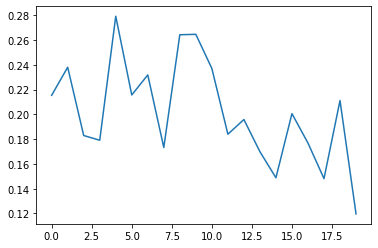

In [ ]:
loss_arr = []
loss_epoch_arr = []
max_epochs = 20

min_loss = 1000

n_iters = np.ceil(len(train_dataset)/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(train_dataloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = efnet(inputs)
        outputs = torch.sigmoid(outputs)
        loss = loss_fn(outputs, labels.float())
        loss.backward()
        
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(efnet.state_dict())
            #print('Min loss %0.2f' % min_loss)
            loss_arr.append(min_loss)
        
        #if i % 100 == 0:
            #print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(test_dataloader, efnet), evaluation(train_dataloader, efnet)))
    
    
plt.plot(loss_epoch_arr)
plt.show()